In [74]:
from math import factorial, comb as C
import operator as op
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mode
from tqdm import tqdm
from loguru import logger

## 习题1.5.1

假设每个人都等可能地出生在一年中的任何一个月里. 如果两个人的出生月份是相互独立的, 那么他们出生在同一个月的概率是多少?

他们的出生月份最多相差一个月的概率是多少?

对于任意的$k\in\{0,1,2,...,12\}$,求他们的出生月份最多相差k个月的概率. 你对两个人的出生月份最多相差一个月的可能性感到惊讶吗?

##### Answer

In [11]:
# 第一问
numerator = C(12, 1) * 1
denominator = C(12, 1) * C(12, 1)
ans = numerator / denominator
print(f"{numerator=}, {denominator=}, {ans=:.3f}")

numerator=12, denominator=144, ans=0.083


In [12]:
# 第二问
numerator = C(12, 1) * C(3, 1)
denominator = C(12, 1) * C(12, 1)
ans = numerator / denominator
print(f"{numerator=}, {denominator=}, {ans=:.3f}")

numerator=36, denominator=144, ans=0.250


In [19]:
# 第三问
def prob(k=0):
    numerator = C(12, 1) * min(C(2 * k + 1, 1), C(12, 1))
    denominator = C(12, 1) * C(12, 1)
    return numerator / denominator

for k in range(13):
    print(f"{k=}, {prob(k)=:.5f}")

k=0, prob(k)=0.08333
k=1, prob(k)=0.25000
k=2, prob(k)=0.41667
k=3, prob(k)=0.58333
k=4, prob(k)=0.75000
k=5, prob(k)=0.91667
k=6, prob(k)=1.00000
k=7, prob(k)=1.00000
k=8, prob(k)=1.00000
k=9, prob(k)=1.00000
k=10, prob(k)=1.00000
k=11, prob(k)=1.00000
k=12, prob(k)=1.00000


##### random sample to validate the answer

In [21]:
num_trials = 1000000
success = 0
a = np.random.randint(12, size=num_trials)
b = np.random.randint(12, size=num_trials)
abs_diff = np.abs(a - b)

# k == 0
print((abs_diff == 0).sum() / num_trials)

for k in range(13):
    print(f"{k=}, prob={(np.minimum(abs_diff, 12 - abs_diff) <= k).sum() / num_trials:.5f}")

0.083718
k=0, prob=0.08372
k=1, prob=0.25040
k=2, prob=0.41681
k=3, prob=0.58362
k=4, prob=0.75005
k=5, prob=0.91693
k=6, prob=1.00000
k=7, prob=1.00000
k=8, prob=1.00000
k=9, prob=1.00000
k=10, prob=1.00000
k=11, prob=1.00000
k=12, prob=1.00000


###### explanation

| A   | B | abs_diff | min(abs_diff, 12 - abs_diff) |
| --- | --- | --- | --- |
|1| 1| 0 |0|
|1| 2| 1 |1|
|1| 3| 2 |2|
|1| 4| 3 |3|
|1| 5| 4 |4|
|1| 6| 5 |5|
|1| 7| 6 |6|
|1| 8| 7 |5|
|1| 9| 8 |4|
|1|10| 9 |3|
|1|11| 10 |2|
|1|12| 11 |1|

## 习题1.5.2

保留生日问题中的条件不变, 并假设每次只有一个人进入房间. 首次与房间里其他人生 日相同的人最有可能第几个进入房间?

##### Thinking

首先需要先计算房间有n个人时，至少2个人生日在同一天的概率。

然后看n和n-1所对应的概率之差，这个差值越大，表明越有可能出现在n-1到n的这个区间，也就是说最有可能是第n个人进来的时候出现相同生日。

In [75]:
def prob(n):
    if n == 1:
        return 0
    if n > 356:
        return 1
    return 1 - reduce(op.mul, [(365 - i) / 365 for i in range(n)])

In [81]:
for n in range(1, 31):
    print(f"{n=}, prob={prob(n):.5f}")

n=1, prob=0.00000
n=2, prob=0.00274
n=3, prob=0.00820
n=4, prob=0.01636
n=5, prob=0.02714
n=6, prob=0.04046
n=7, prob=0.05624
n=8, prob=0.07434
n=9, prob=0.09462
n=10, prob=0.11695
n=11, prob=0.14114
n=12, prob=0.16702
n=13, prob=0.19441
n=14, prob=0.22310
n=15, prob=0.25290
n=16, prob=0.28360
n=17, prob=0.31501
n=18, prob=0.34691
n=19, prob=0.37912
n=20, prob=0.41144
n=21, prob=0.44369
n=22, prob=0.47570
n=23, prob=0.50730
n=24, prob=0.53834
n=25, prob=0.56870
n=26, prob=0.59824
n=27, prob=0.62686
n=28, prob=0.65446
n=29, prob=0.68097
n=30, prob=0.70632


In [96]:
probs = np.array([prob(i) for i in np.arange(365) + 1])
diff = probs[1:] - probs[:-1]
diff.argmax(), diff.max()
print(f"answer: the {diff.argmax() + 1 + 1}-th person")  # 1 is due to diff, 1 is due to 0-index list

answer: the 20-th person


##### Validation by Random Sampling

In [95]:
num_trials = 1000000
history = []
for _ in tqdm(range(num_trials)):
    birthdays = np.random.randint(365, size=366)
#     registry = 0
    for i, d in enumerate(birthdays):
        if d in birthdays[:i]:
            history.append(i + 1)
            break

100%|██████████| 1000000/1000000 [00:50<00:00, 19846.02it/s]


In [97]:
print(len(history))
print(mode(history))

1000000
ModeResult(mode=array([19]), count=array([32265]))


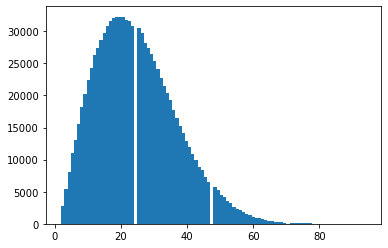

In [98]:
_ = plt.hist(history, bins=96)

## 习题1.5.3

我们已经证明了, 当房间里有23人时, 至少有两人生日在同一天的概率为50%. 平均来说, 需要多少人才能使至少有两人生日在同一天?

##### 思路

求期望

In [103]:
# 借用1.5.2的函数
def prob(n):
    if n == 1:
        return 0
    if n > 356:
        return 1
    return 1 - reduce(op.mul, [(365 - i) / 365 for i in range(n)])

cdf = np.array([prob(i) for i in np.arange(365) + 1])  # 累计概率密度函数
density = cdf[1:] - cdf[:-1]  # 概率密度函数，由累计概率密度函数求导得来
print(density.sum())  # 验证：全加为1
print(np.array([x * d for x, d in enumerate(density)]).sum())  # 求期望

1.0
22.61658589459885
